In [14]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
panel_rent_per_sf_per_neighborhood = pd.read_csv('../data/panel_rent_per_sf_per_neighborhood.csv', index_col=0)
panel = gpd.read_feather('../data/panel_data_estimated_costs.geofeather')
panel_df = pd.merge(panel, panel_rent_per_sf_per_neighborhood)

### Suicide

Not enough occuring within the home. Zero are developed into housing before or after.

In [6]:
suicides = gpd.read_feather('../data/suicides.geofeather')

In [7]:
suicides

,descript,date,address,geometry,year
741,SUICIDE BY ASPHYXIATION,2004-09-01,2700 Block of LOMBARD ST,POINT (-122.44664 37.79849),2004
9913,SUICIDE,2009-02-16,100 Block of LOMBARD ST,POINT (-122.40417 37.80388),2009
15883,SUICIDE BY ASPHYXIATION,2010-04-23,800 Block of BRYANT ST,POINT (-122.40340 37.77542),2010
16708,SUICIDE BY INGESTION,2009-12-02,500 Block of BATTERY ST,POINT (-122.40052 37.79634),2009
18125,SUICIDE BY JUMPING,2007-11-15,100 Block of GGBRIDGE HY,POINT (-122.47465 37.80665),2007
...,...,...,...,...,...
2107646,SUICIDE BY ASPHYXIATION,2017-09-09,800 Block of OFARRELL ST,POINT (-122.41875 37.78512),2017
2113330,SUICIDE,2017-05-10,100 Block of MASON ST,POINT (-122.40947 37.78482),2017
2122045,SUICIDE BY STRANGULATION,2017-11-25,600 Block of STOCKTON ST,POINT (-122.40735 37.79179),2017
2124719,SUICIDE BY STRANGULATION,2017-09-06,1300 Block of FULTON ST,POINT (-122.43902 37.77669),2017


In [9]:
panel_suicides = gpd.sjoin(panel_df,
                        suicides[['geometry', 'year']].rename(columns={'year': 'suicide_year'}), 
                        how='left',
                        predicate='contains')

In [18]:
panel_suicides

,MapBlkLot_Master,year,Developed,Historic,Residential_Dummy,Zillow_Price_Real,Const_FedReserve_Real,Envelope_1000,Upzone_Ratio,zp_OfficeComm,...,assessed_improvement_value,imputed_land_value,non_geo_match,estimated_cost,home_size1,rent,rent/sf,index_right,suicide_year,years_since_suicide
0,0005001,2007.0,0,1,0,93.227099,92.120253,86.389615,1.666667,1,...,0.0,1.340638e+06,True,2.719712e+07,1015.0,1.188863e+06,1171.0,NaN,NaN,NaN
1,0010001,2007.0,0,1,0,93.227099,92.120253,70.323595,0.526079,1,...,6989681.0,3.093604e+06,True,2.443850e+07,1015.0,1.188863e+06,1171.0,NaN,NaN,NaN
2,0112004,2007.0,0,1,0,93.227099,92.120253,7.509173,0.434961,1,...,234148.0,1.756770e+05,True,1.017204e+07,1015.0,1.188863e+06,1171.0,NaN,NaN,NaN
3,0107007,2007.0,0,0,0,93.227099,92.120253,89.426574,0.128800,1,...,80253059.0,3.534125e+06,True,3.502249e+07,1015.0,1.188863e+06,1171.0,NaN,NaN,NaN
4,0111001,2007.0,0,1,0,93.227099,92.120253,18.805287,0.537632,1,...,4626139.0,2.252497e+06,True,1.289243e+07,1015.0,1.188863e+06,1171.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328142,5642020,2009.0,0,0,0,78.128626,91.670259,9.170144,1.667299,0,...,248617.0,1.906050e+05,True,2.886471e+06,1152.0,8.063952e+05,700.0,NaN,NaN,NaN
1328143,5541041,2009.0,0,0,1,78.128626,91.670259,2.000000,0.961076,0,...,182607.0,1.826070e+05,False,3.250000e+05,1152.0,8.063952e+05,700.0,NaN,NaN,NaN
1328144,5617046,2009.0,0,0,1,78.128626,91.670259,1.924999,0.846153,0,...,313043.0,1.499960e+05,False,2.165493e+05,1152.0,8.063952e+05,700.0,NaN,NaN,NaN
1328145,5617048,2009.0,0,0,1,78.128626,91.670259,1.924988,0.875791,0,...,572893.0,2.387030e+05,False,2.166079e+05,1152.0,8.063952e+05,700.0,NaN,NaN,NaN


In [11]:
panel_suicides['years_since_suicide'] = panel_suicides.year - panel_suicides.suicide_year

In [20]:
panel_suicides.index_right.notna().sum()

222

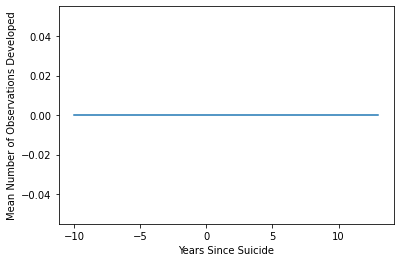

In [16]:
# Compute the mean for each unique value of 'years_since_fire'
plot_data = panel_suicides.groupby('years_since_suicide')['Developed'].mean().reset_index()

# Plot using seaborn
sns.lineplot(x='years_since_suicide', y='Developed', data=plot_data)
plt.ylabel('Mean Number of Observations Developed')
plt.xlabel('Years Since Suicide')
plt.show()

In [17]:
plot_data

,years_since_suicide,Developed
0,-10.0,0.0
1,-9.0,0.0
2,-8.0,0.0
3,-7.0,0.0
4,-6.0,0.0
5,-5.0,0.0
6,-4.0,0.0
7,-3.0,0.0
8,-2.0,0.0
9,-1.0,0.0


### Death Reports


In [22]:
deaths = gpd.read_feather('../data/death_reports.geofeather')

In [23]:
deaths

,descript,date,address,geometry,year
178,"DEATH REPORT, CAUSE UNKNOWN",2013-04-29,4600 Block of 3RD ST,POINT (-122.39015 37.73595),2013
183,"DEATH REPORT, CAUSE UNKNOWN",2005-12-22,300 Block of HAIGHT ST,POINT (-122.42801 37.77247),2005
371,"DEATH REPORT, NATURAL CAUSES",2007-09-17,0 Block of BECKETT ST,POINT (-122.40637 37.79651),2007
373,"DEATH REPORT, NATURAL CAUSES",2007-03-08,500 Block of HURON AV,POINT (-122.44705 37.71396),2007
419,"DEATH REPORT, CAUSE UNKNOWN",2004-03-23,1600 Block of THE EMBARCADERO NORTH ST,POINT (-122.41077 37.80844),2004
...,...,...,...,...,...
2127354,"DEATH REPORT, CAUSE UNKNOWN",2017-08-18,5200 Block of GEARY BL,POINT (-122.47565 37.78063),2017
2127573,"DEATH REPORT, CAUSE UNKNOWN",2017-10-13,800 Block of PACIFIC AV,POINT (-122.40906 37.79668),2017
2127587,"DEATH REPORT, CAUSE UNKNOWN",2017-01-31,1700 Block of OFARRELL ST,POINT (-122.43356 37.78324),2017
2128525,"DEATH REPORT, CAUSE UNKNOWN",2017-05-02,VELASCO AV / SANTOS ST,POINT (-122.41935 37.70995),2017


In [25]:
panel_deaths = gpd.sjoin(panel_df,
                        deaths[['geometry', 'year']].rename(columns={'year': 'death_year'}), 
                        how='left',
                        predicate='contains')

In [43]:
panel_deaths = panel_deaths.loc[~panel_deaths.index.duplicated()].copy()

In [49]:
panel_deaths.loc[panel_deaths.index_right.notna()]['Developed'].sum()

0

In [44]:
panel_deaths['years_since_death'] = panel_deaths.year - panel_deaths.death_year

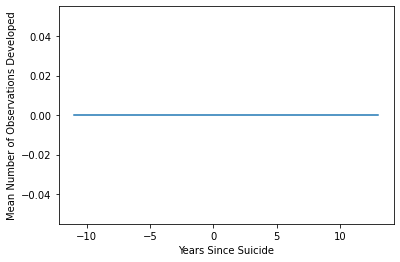

In [45]:
# Compute the mean for each unique value of 'years_since_fire'
plot_data = panel_deaths.groupby('years_since_death')['Developed'].mean().reset_index()

# Plot using seaborn
sns.lineplot(x='years_since_death', y='Developed', data=plot_data)
plt.ylabel('Mean Number of Observations Developed')
plt.xlabel('Years Since Suicide')
plt.show()

In [46]:
plot_data

,years_since_death,Developed
0,-11.0,0.0
1,-10.0,0.0
2,-9.0,0.0
3,-8.0,0.0
4,-7.0,0.0
5,-6.0,0.0
6,-5.0,0.0
7,-4.0,0.0
8,-3.0,0.0
9,-2.0,0.0
